In [55]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [56]:
# Create a set of random latitude and longitude combinations. (zip function groups lats and lngs as pairs)
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [57]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [58]:
# unzip lats and lngs into list.
coordinates

[(-20.458859216709754, 121.1038678801242),
 (21.55172059701472, -178.65214738310937),
 (-64.49341593075005, -65.43422362015949),
 (5.8973048123243785, -126.09759815799448),
 (47.2211004122303, -86.1416956981458),
 (-61.0815799831187, 15.655811179175203),
 (87.10727828187211, -102.53650321309327),
 (-4.058438421175225, -134.78862399520642),
 (43.86934394479806, -122.9187715296159),
 (27.8503282222959, 47.62974479991709),
 (-59.65797746728593, -138.85579889912918),
 (-35.64666913702498, 153.67808731844775),
 (-83.90626259889325, 54.61245723019988),
 (8.712305258425062, 18.3574527763289),
 (72.7110766432636, 71.35643646479238),
 (-30.031096718964776, 70.50884388577654),
 (-11.694303300902902, -145.73188485126786),
 (-20.131040380988622, 108.42037970421376),
 (46.550309130379986, 21.999082931926438),
 (12.926146687387103, -130.2534711812342),
 (-14.39898581950375, 165.19224873304097),
 (-5.499366618846281, 102.96741993968271),
 (-6.573159354952367, 6.804037910008503),
 (46.02030050736525, 

In [59]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [60]:
import sys
sys.path.append("C:/Users/c_tal/Desktop")
from api_keys import weather_api_key
api_key = weather_api_key

In [ ]:
import requests
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [62]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [63]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
 # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")       
    

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port hedland
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | marquette
Processing Record 6 of Set 1 | hermanus
Processing Record 7 of Set 1 | yellowknife
Processing Record 8 of Set 1 | springfield
Processing Record 9 of Set 1 | bayan
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | kiama
Processing Record 12 of Set 1 | port alfred
Processing Record 13 of Set 1 | sarh
Processing Record 14 of Set 1 | yar-sale
Processing Record 15 of Set 1 | bambous virieux
Processing Record 16 of Set 1 | tiarei
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | beliu
Processing Record 19 of Set 1 | guerrero negro
Processing Record 20 of Set 1 | luganville
Processing Record 21 of Set 1 | lahat
Processing Record 22 of Set 1 | mayumba
Processing Record 23 of Set 1 | kalanchak
P

Processing Record 41 of Set 4 | karratha
Processing Record 42 of Set 4 | afmadu
City not found. Skipping...
Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | porbandar
Processing Record 45 of Set 4 | ronne
Processing Record 46 of Set 4 | jacareacanga
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | tabou
Processing Record 50 of Set 4 | gari
Processing Record 1 of Set 5 | broome
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | rio grande
Processing Record 4 of Set 5 | thompson
Processing Record 5 of Set 5 | mangit
Processing Record 6 of Set 5 | port elizabeth
Processing Record 7 of Set 5 | saskylakh
Processing Record 8 of Set 5 | urumqi
Processing Record 9 of Set 5 | viedma
Processing Record 10 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 11 of Set 5 | puerto ayora
Processing Record 12 of Set 5 | grindavik
Processing Record 13 of Set 5 | aktash
Processing Reco

Processing Record 29 of Set 8 | port blair
Processing Record 30 of Set 8 | paka
Processing Record 31 of Set 8 | stoyba
City not found. Skipping...
Processing Record 32 of Set 8 | east london
Processing Record 33 of Set 8 | merta
Processing Record 34 of Set 8 | samarai
Processing Record 35 of Set 8 | daru
Processing Record 36 of Set 8 | hofn
Processing Record 37 of Set 8 | tuensang
Processing Record 38 of Set 8 | alyangula
Processing Record 39 of Set 8 | north platte
Processing Record 40 of Set 8 | big bend
Processing Record 41 of Set 8 | khabarovsk
Processing Record 42 of Set 8 | faanui
Processing Record 43 of Set 8 | kavali
Processing Record 44 of Set 8 | belen
Processing Record 45 of Set 8 | palana
Processing Record 46 of Set 8 | bakchar
Processing Record 47 of Set 8 | san quintin
Processing Record 48 of Set 8 | karaton
Processing Record 49 of Set 8 | edd
Processing Record 50 of Set 8 | lahaina
Processing Record 1 of Set 9 | marsh harbour
Processing Record 2 of Set 9 | gurgan
City no

Processing Record 14 of Set 12 | baindur
Processing Record 15 of Set 12 | banda aceh
Processing Record 16 of Set 12 | brigantine
Processing Record 17 of Set 12 | villacarrillo
Processing Record 18 of Set 12 | ranong
Processing Record 19 of Set 12 | khandyga
Processing Record 20 of Set 12 | fereydun kenar
Processing Record 21 of Set 12 | marystown
Processing Record 22 of Set 12 | chulym
Processing Record 23 of Set 12 | chivay
Processing Record 24 of Set 12 | tamluk
Processing Record 25 of Set 12 | barawe
City not found. Skipping...
Processing Record 26 of Set 12 | qinzhou
Processing Record 27 of Set 12 | tateyama
Processing Record 28 of Set 12 | sunland park
Processing Record 29 of Set 12 | cookeville
Processing Record 30 of Set 12 | alofi
Processing Record 31 of Set 12 | fougamou
Processing Record 32 of Set 12 | ambilobe
Processing Record 33 of Set 12 | zilair
Processing Record 34 of Set 12 | sulzbach-rosenberg
Processing Record 35 of Set 12 | pitimbu
Processing Record 36 of Set 12 | b

In [66]:
# check number of cities in city_data dictionary array
len(city_data)

572

In [67]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Hedland,-20.3167,118.5667,80.65,61,22,5.75,AU,2021-12-25 21:55:03
1,Kapaa,22.0752,-159.3190,78.78,67,71,1.99,US,2021-12-25 21:55:03
2,Ushuaia,-54.8000,-68.3000,55.06,44,75,6.91,AR,2021-12-25 21:55:03
3,Atuona,-9.8000,-139.0333,78.89,68,11,15.17,PF,2021-12-25 21:55:04
4,Marquette,46.5333,-87.6335,25.34,55,89,9.22,US,2021-12-25 21:55:04
5,Hermanus,-34.4187,19.2345,67.80,85,85,15.21,ZA,2021-12-25 21:55:04
6,Yellowknife,62.4560,-114.3525,-6.59,87,90,14.97,CA,2021-12-25 21:53:46
7,Springfield,37.2153,-93.2982,64.26,49,1,1.99,US,2021-12-25 21:50:42
8,Bayan,46.0833,127.4000,-17.55,97,50,4.47,CN,2021-12-25 21:55:05
9,Rikitea,-23.1203,-134.9692,77.40,77,100,21.65,PF,2021-12-25 21:55:05


In [68]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Hedland,AU,2021-12-25 21:55:03,-20.3167,118.5667,80.65,61,22,5.75
1,Kapaa,US,2021-12-25 21:55:03,22.0752,-159.3190,78.78,67,71,1.99
2,Ushuaia,AR,2021-12-25 21:55:03,-54.8000,-68.3000,55.06,44,75,6.91
3,Atuona,PF,2021-12-25 21:55:04,-9.8000,-139.0333,78.89,68,11,15.17
4,Marquette,US,2021-12-25 21:55:04,46.5333,-87.6335,25.34,55,89,9.22
...,...,...,...,...,...,...,...,...,...
567,Chuchkovo,RU,2021-12-25 22:10:06,54.2693,41.4465,9.28,92,33,13.02
568,Pacific Grove,US,2021-12-25 22:09:00,36.6177,-121.9166,54.43,78,83,8.01
569,Ambulu,ID,2021-12-25 22:10:07,-8.3450,113.6058,77.29,90,99,3.22
570,Paita,PE,2021-12-25 22:10:07,-5.0892,-81.1144,75.76,75,55,16.22


In [69]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [70]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

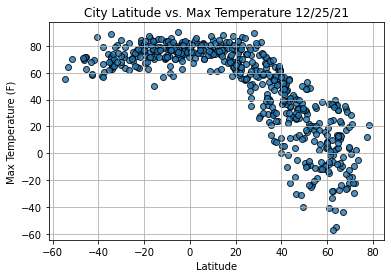

In [71]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

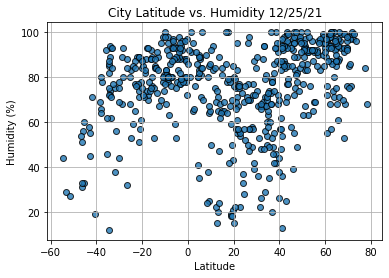

In [72]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

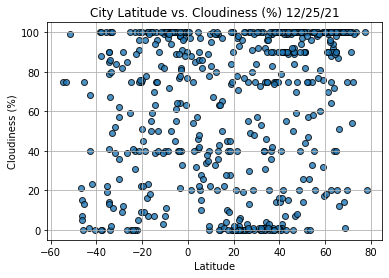

In [73]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

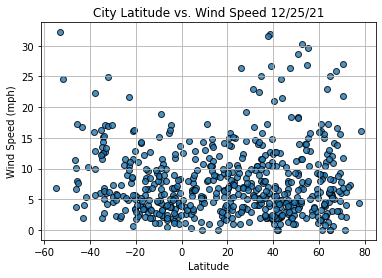

In [74]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [75]:
# Import linregress
from scipy.stats import linregress

In [76]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [77]:
index13 = city_data_df.loc[13]
# get specific row from dataframe

In [78]:
index13


City                     Yar-Sale
Country                        RU
Date          2021-12-25 21:55:06
Lat                       66.8333
Lng                       70.8333
Max Temp                    -2.49
Humidity                       93
Cloudiness                    100
Wind Speed                  14.16
Name: 13, dtype: object

In [79]:
# filter for all Lat greater than 0(.head just 5)
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Kapaa,US,2021-12-25 21:55:03,22.0752,-159.3190,78.78,67,71,1.99
4,Marquette,US,2021-12-25 21:55:04,46.5333,-87.6335,25.34,55,89,9.22
6,Yellowknife,CA,2021-12-25 21:53:46,62.4560,-114.3525,-6.59,87,90,14.97
7,Springfield,US,2021-12-25 21:50:42,37.2153,-93.2982,64.26,49,1,1.99
8,Bayan,CN,2021-12-25 21:55:05,46.0833,127.4000,-17.55,97,50,4.47


In [80]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [81]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

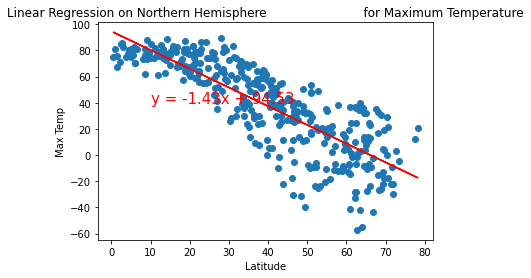

In [82]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

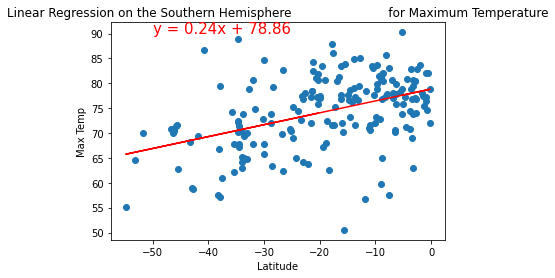

In [83]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

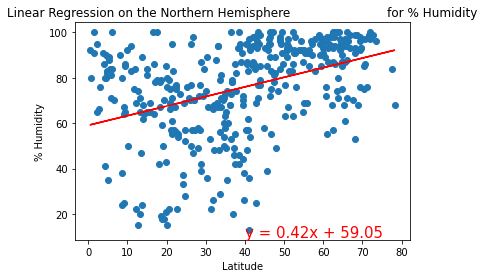

In [86]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

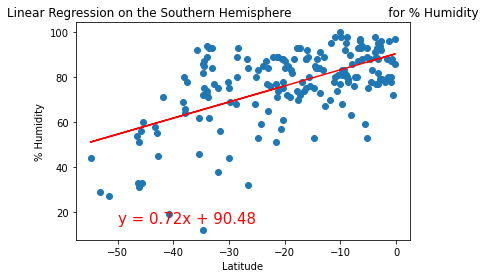

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

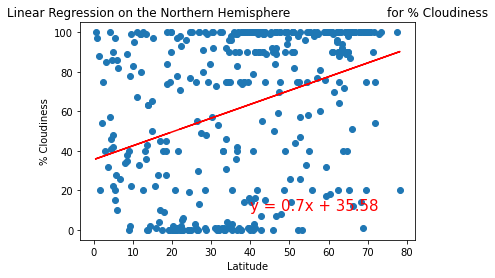

In [89]:
# Linear regression on the Northern Hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

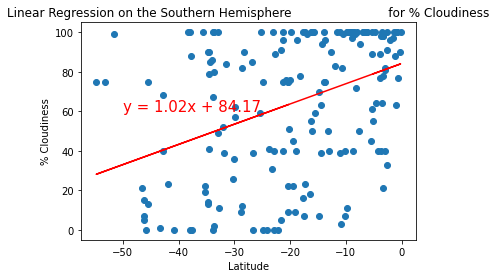

In [91]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

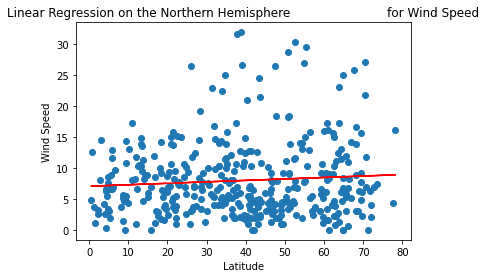

In [95]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

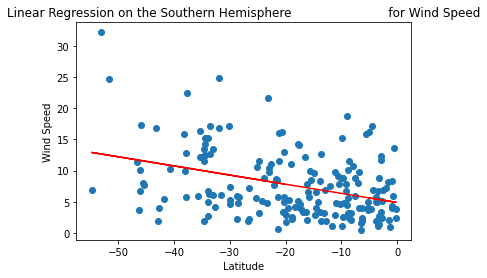

In [97]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))